#  Install package

In [356]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
# ! pip install contextily
# ! pip install matplotlib_scalebar
# ! pip install langchain
# ! pip install langchain-openai

# Import package

In [357]:
%load_ext autoreload
%autoreload 2
    
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
# from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

import base64

import pickle
import sys



import LLM_Find_Constants as constants
import helper

from LLM_Find_kernel import Solution

from langchain_openai import ChatOpenAI

from langchain_core.prompts import ChatPromptTemplate





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [358]:

OpenAI_key = helper.load_OpenAI_key()
# llm = ChatOpenAI(api_key=OpenAI_key, model="gpt-4o", temperature=0)

## Input task and data desciption

In [359]:
# isReview = True
isReview = False

In [360]:
# task

In [361]:
# # Case 1
# task_name ='OSM_PA_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_PA_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Pennsylvania State, USA from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_SC_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_SC_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of South Carolina State, USA from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

 # task_name ='OSM_PA_hospital'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_PA_hospital.gpkg.'
# task = rf'''1. Download all hospital of Pennsylvania State, USA from OpenStreetMap.
# 2. Save the downloaded data as points in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='OSM_Nigeria_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_Nigeria_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Nigeria from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''


# task_name ='OSM_Afghanistan_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\OSM_Afghanistan_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Afghanistan from OpenStreetMap.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# Case 1
# task_name ='Census_Centre_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_Centre_boundary.gpkg.'
# task = rf'''1. Download the administrative boundary of Centre County of Pennsylvania State, USA from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

task_name ='Census_SC_countries_boundary'
saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg.'
task = rf'''1. Download the administrative boundary of all Counties of South Carolina from Census Bureau.
2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
'''


save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
# model_name = "gpt-3.5-turbo"


model_name = r'gpt-4o'


model = ChatOpenAI(api_key=OpenAI_key, model=model_name, temperature=1, stream=True)

# model

e:\ProgramData\Anaconda3\envs\ox\Lib\site-packages\langchain_core\utils\utils.py:161: UserWarning: WARNING! stream is not default parameter.
                stream was transferred to model_kwargs.
                Please confirm that stream is what you intended.
  warnings.warn(


In [362]:
%load_ext autoreload
%autoreload 2
import helper
    
source_select_prompt_str = helper.create_select_prompt(task=task)

# solution = Solution(
#                     task=TASK,
#                     task_name=task_name,
#                     save_dir=save_dir,
#                     data_locations=DATA_LOCATIONS,
#                     model=model,
#                     )
# print("Prompt to select data source:\n")
# print(source_select_prompt_langChain.dict()['messages'][1]['prompt']['template'])
print(source_select_prompt_str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data.
 
Your mission: select a suitable data source from the given list to download the requested geo-spatial data for this task: 1. Download the administrative boundary of all Counties of South Carolina from Census Bureau.
2. Save the downloaded data in GeoPackage format, save it at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Da

In [363]:
# print("")

from IPython.display import clear_output

chunks = []

async for chunk in model.astream(source_select_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)
print(LLM_reply_str)

{
  "Explanation": "According to the task requirements to download the administrative boundary of all Counties of South Carolina from Census Bureau, I should select the Census Bureau as the data source.",
  "Selected data source": "US Census Bureau"
}


In [364]:
import ast
select_source = ast.literal_eval(LLM_reply_str)

selected_data_source= select_source['Selected data source']
data_source_ID = constants.data_source_dict[selected_data_source]['ID']

print("selected_data_source:", selected_data_source)
print("data_source_ID:", data_source_ID)

handbook_list = constants.handbooks[f"{data_source_ID}"]
handbook_str =  '\n'.join([f"{idx + 1}. {line}" for idx, line in enumerate(handbook_list)])
print()
print(f"Handbook:\n{handbook_str}")

selected_data_source: US Census Bureau
data_source_ID: US_Census

Handbook:
1. If the place of boundaries request is in the USA, you can download boundaries from Census Bureau, which is official and better than OSM. An example link is: https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_{year}_{extend}_{level}_500k.zip. You can change the year and administrative level (state/county) in link accordingly. 'year' is 4-digit. 'extend' can be 'us' or 2-digit state FIPS; when 'extend' = 'us', 'level' can be 'state' and 'county' only, and the downloaded data is national. When 'extend' is 2-digit state FIPS, 'level' can be 'tract' and 'bg' only. 'bg' refers to block groups. E.g., do not set 'extend' to 2-digit FIPS code when download county boundaries for a state. If you need to download counties boundaries, 'extend' must be 'us'.
2. If the file saving format is not given in the tasks, save the downloaded files into GeoPackage format.
3. You need to create Python code to download and save the da

In [365]:
# constants.handbooks[f"US_Census"]

%load_ext autoreload
%autoreload 2

download_prompt_str = helper.create_download_prompt(task, selected_data_source, handbook_str)

# solution = Solution(
#                     task=TASK,
#                     task_name=task_name,
#                     save_dir=save_dir,
#                     data_locations=DATA_LOCATIONS,
#                     model=model,
#                     )
# print("Prompt to select data source:\n")
# print(source_select_prompt_langChain.dict()['messages'][1]['prompt']['template'])
print(download_prompt_str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data. When downloading geo-spatial data, the handbook for a perticular data source is provided, you can follow it, and write Python code carefully to download the data. 
 
Your mission: download geo-spatial data from the given data source for this task: 1. Download the administrative boundary of all Counties of South Carolina from Census Bureau.
2. Save the downloaded data in Geo

In [366]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(download_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)
print(LLM_reply_str)

```python
def download_data():
    import geopandas as gpd

    # Define the URL for downloading the county boundaries of the USA
    year = 2021
    extend = 'us'
    level = 'county'
    url = f"https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_{year}_{extend}_{level}_500k.zip"

    # Load the shapefile directly from the URL using GeoPandas
    counties = gpd.read_file(url)

    # Filter for the counties in South Carolina (FIPS Code: 45)
    sc_counties = counties[counties['STATEFP'] == '45']

    # Define the output path
    output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg"

    # Save the data to a GeoPackage
    sc_counties.to_file(output_path, layer='SC_counties', driver='GPKG')

# Execute the function
download_data()
```


In [367]:
code = helper.extract_code_from_str(LLM_reply_str)
display(Code(code, language='python'))

def download_data():
    import geopandas as gpd

    # Define the URL for downloading the county boundaries of the USA
    year = 2021
    extend = 'us'
    level = 'county'
    url = f"https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_{year}_{extend}_{level}_500k.zip"

    # Load the shapefile directly from the URL using GeoPandas
    counties = gpd.read_file(url)

    # Filter for the counties in South Carolina (FIPS Code: 45)
    sc_counties = counties[counties['STATEFP'] == '45']

    # Define the output path
    output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg"

    # Save the data to a GeoPackage
    sc_counties.to_file(output_path, layer='SC_counties', driver='GPKG')

# Execute the function
download_data()

In [368]:
%load_ext autoreload
%autoreload 2

code = helper.execute_complete_program(code=code, try_cnt=10)
display(Code(code, language='python'))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


-------------- Running code (trial # 1/10) --------------




e:\ProgramData\Anaconda3\envs\ox\Lib\asyncio\selector_events.py:879: ResourceWarning: unclosed transport <_SelectorSocketTransport fd=5808 read=idle write=<idle, bufsize=0>>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)
e:\ProgramData\Anaconda3\envs\ox\Lib\asyncio\selector_events.py:879: ResourceWarning: unclosed transport <_SelectorSocketTransport fd=5692 read=idle write=<idle, bufsize=0>>
  _warn(f"unclosed transport {self!r}", ResourceWarning, source=self)




--------------- Done ---------------




e:\ProgramData\Anaconda3\envs\ox\Lib\site-packages\jupyter_client\session.py:201: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


def download_data():
    import geopandas as gpd

    # Define the URL for downloading the county boundaries of the USA
    year = 2021
    extend = 'us'
    level = 'county'
    url = f"https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_{year}_{extend}_{level}_500k.zip"

    # Load the shapefile directly from the URL using GeoPandas
    counties = gpd.read_file(url)

    # Filter for the counties in South Carolina (FIPS Code: 45)
    sc_counties = counties[counties['STATEFP'] == '45']

    # Define the output path
    output_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg"

    # Save the data to a GeoPackage
    sc_counties.to_file(output_path, layer='SC_counties', driver='GPKG')

# Execute the function
download_data()

# Show the downloaded data

e:\ProgramData\Anaconda3\envs\ox\Lib\site-packages\jupyter_client\session.py:201: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


<Axes: >

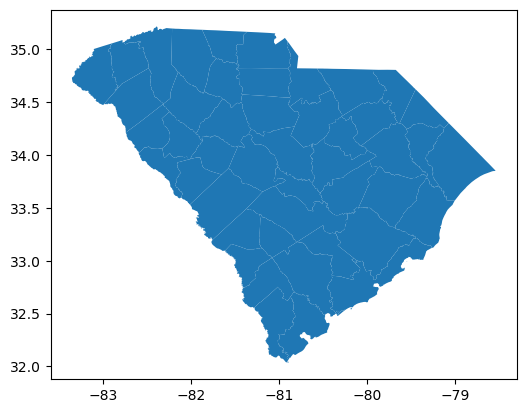

In [369]:
gdf = gpd.read_file(saved_fname)
gdf.plot()

In [370]:
saved_fname

'E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Find\\Downloaded_Data\\Census_SC_counties_boundary.gpkg.'